# BlueBerry Winery - Wine Quality Prediction with Machine Learning

Develop models to determine the quality of the wines produced based on their chemical composition

## Load libraries and data

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import preprocessing, svm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score 

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')
wines = pd.read_csv('wines_combined.csv')
display(wines)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,color
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white


## Data Wrangling 2

### 1. Change column headings to snake_case and use IUPAC standard spelling ('sulfates')

In [3]:
display(wines)
wines = wines.rename(columns={"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity", "citric acid": "citric_acid", "residual sugar" : "residual_sugar", "free sulfur dioxide" : "free_sulfur_dioxide", "total sulfur dioxide" : "total_sulfur_dioxide", "sulphates" : "sulfates"})
display(wines)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,color
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white


,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,quality_label,color
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white


### 2. Drop old index values form red/white datasets

In [4]:
wines = wines.drop(['Unnamed: 0'], axis=1)

In [5]:
display(wines)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,quality_label,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white


### 3. Drop duplicates

In [6]:
# First, check for duplicates using duplicated() ## FIXED now that second index removed
# use the value counts of duplicated() to show how many items are duplicated
display('Counts of duplicated items:', wines.duplicated().value_counts())

## workaround, no longer needed #############
# Make a a new df contining only numerical data and no index (indexes are always unique and might cause a false negative)
#df_dup_compare = wines.loc[:,'fixed acidity':'quality']

# use the value counts of duplicated() to show how many items are duplicated
#display("Counts of items that are duplications of previous items (in new df):", df_dup_compare.duplicated().value_counts())

# display all the rows of the duplicated() output series where duplicated==True
## use keep=False to (counterintuitively) keep all instances of duplicated entries
#display("All indices with dupicated data:", df_dup_compare.duplicated(keep=False)[lambda x : x == True])

# display all the rows of the df where duplicated == True
#wines_duplicates = df_dup_compare[df_dup_compare.duplicated() == True]
#display("All df rows which are duplications:", wines_duplicates)

# write csv of duplicated data for checking
#wines_duplicates.to_csv('wines_duplicates.csv')
#####################################

wines_clean = wines.drop_duplicates(keep='last').reset_index()
display(wines_clean)

'Counts of duplicated items:'

False    5320
True     1177
dtype: int64

,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,quality_label,color
0,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red
1,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red
2,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red
3,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
4,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,low,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white
5316,6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white
5317,6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white
5318,6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white


### 4. Double-check data types

In [7]:
wines_clean.dtypes

index                     int64
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulfates                float64
alcohol                 float64
quality                   int64
quality_label            object
color                    object
dtype: object

In [8]:
# cast columns to Categorical (pandas) data type:
# color, unordered
wines_clean['color'] = pd.Categorical(wines_clean['color'],
ordered=False)

# quality_label, ordered low to high
wines_clean['quality_label'] = pd.Categorical(wines_clean['quality_label'],
categories=['low', 'medium', 'high'], ordered=True)

wines_clean.dtypes

display(wines_clean)

,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,quality_label,color
0,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red
1,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red
2,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red
3,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
4,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,low,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white
5316,6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white
5317,6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white
5318,6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white


### 5. Calculate skewness and kurtosis

Skewness: outside -0.5 and +0.5 is considered highly skewed [source?]

In [9]:
print((wines_clean.select_dtypes(include=['int64', 'float64'])).astype(float).skew())

index                   0.050375
fixed_acidity           1.650417
volatile_acidity        1.504557
citric_acid             0.484309
residual_sugar          1.706550
chlorides               5.338237
free_sulfur_dioxide     1.362719
total_sulfur_dioxide    0.063614
density                 0.666326
pH                      0.389969
sulfates                1.809454
alcohol                 0.545696
quality                 0.147467
dtype: float64


Kurtosis: XXX is considered high [source]

In [10]:
print((wines_clean.select_dtypes(include=['int64', 'float64'])).astype(float).kurt())

index                   -1.188777
fixed_acidity            4.589079
volatile_acidity         2.863175
citric_acid              2.582471
residual_sugar           7.025595
chlorides               48.260708
free_sulfur_dioxide      9.520706
total_sulfur_dioxide    -0.299997
density                  8.711498
pH                       0.431811
sulfates                 8.612917
alcohol                 -0.538169
quality                  0.298100
dtype: float64


## Data preprocessing for ML 1

### 1. Encoding categorical variables

Use scikit. Resources: 
- https://scikit-learn.org/stable/modules/preprocessing.html 
- https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
- https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets

#### Quality Label (Ordinal: Label Encoder)

In [11]:
# add a new cat_ variable storing a numerical code for each category
## note: didn't use LabelEncoder, used .cat.codes as per https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

wines_clean['quality_label_cat'] = wines_clean['quality_label'].cat.codes 
display(wines_clean)

,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,quality_label,color,quality_label_cat
0,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red,0
1,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red,0
2,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red,1
3,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red,0
4,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,low,red,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white,1
5316,6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white,0
5317,6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white,1
5318,6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white,1


In [12]:
display(wines_clean.quality_label_cat.value_counts(), wines_clean.quality_label.value_counts())

1    3179
0    1988
2     153
Name: quality_label_cat, dtype: int64

medium    3179
low       1988
high       153
Name: quality_label, dtype: int64

#### Color (Nominal: One-Hot Encoder)

In [13]:
# OHE creates new dummy variable columns for each category, with binary encoding (one of them 1, all others 0) indicating whether the category is applied

# Step 1: OHE needs numerica data, so first transform categorical data using LabelEncoder() [This time really use LabelEncoder!]

# create an instance of labelencoder  -TODO: explain this more
labelencoder = LabelEncoder()
# make new column and apply numerical category values
wines_clean['color_cat'] = labelencoder.fit_transform(wines_clean['color'])

# Step 2: Now use OneHotEncoder. reference: https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
## First, create an instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# pass in color_cat to make a df containing the multiple (here, 2) binary encoding columns
enc_df = pd.DataFrame(enc.fit_transform(wines_clean[['color_cat']]).toarray())
#display('encoder array:', enc_df)

# merge df with wines_clean
wines_clean = wines_clean.join(enc_df)

# rename 0 and 1 (this time manually but look into get_feature_names_out and ColumnTransformer)
wines_clean = wines_clean.rename(columns={0: 'is_red', 1: 'is_white'})
display(wines_clean)

,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,quality_label,color,quality_label_cat,color_cat,is_red,is_white
0,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red,0,0,1.0,0.0
1,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red,0,0,1.0,0.0
2,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red,1,0,1.0,0.0
3,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red,0,0,1.0,0.0
4,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,low,red,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white,1,1,0.0,1.0
5316,6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white,0,1,0.0,1.0
5317,6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white,1,1,0.0,1.0
5318,6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white,1,1,0.0,1.0


### 2. Separate off training set (split)

Use `test_train_split` to separate testing and traning portions of the data. [criteria for % proportion, source]

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [14]:
## first split for single variable linear regression
#make new variables for???
density = wines_clean.density
quality = wines_clean.quality

#first reshape (which data?? workbook says main data but web says test data) into ndarray otherwise we get an error #TODO: expand (https://stackoverflow.com/questions/47761744/cant-do-linear-regression-in-scikit-learn-due-to-reshaping-issue)
density = density.values.reshape(-1, 1)
quality = quality.values.reshape(-1, 1)

#split data
density_train, density_test, quality_train, quality_test = train_test_split(density, quality, test_size=0.2, random_state=0)
density_test

array([[0.99584],
       [0.997  ],
       [0.99212],
       ...,
       [0.9939 ],
       [0.99415],
       [0.9938 ]])

## Linear Regression

### (Linear Regression Machine Learning Model with Single Variable: Density)
note: not to be confused with logistical regression

### 1. Fit the model

In [15]:
reg_density = linear_model.LinearRegression()
reg_density.fit(density_train, quality_train)

LinearRegression()

### 2. Make predicitons and evaluate

In [16]:
# apply the .predict() method to make predictions using test data.
#find accuracy score
reg_density_score = (reg_density.score(density_test, quality_test) * 100).round(2)
print("The accuracy of the ML model based on Living Area is:", reg_density_score , "%")

#pick a value to test prediction
density_input = 1     ## variable to test y and X
pred_1 = reg_density.predict([[density_input]]) 
print(f"A wine of density {density_input} may have a quality of: {pred_1} and is {reg_density_score}% accurate" )


The accuracy of the ML model based on Living Area is: 12.26 %
A wine of density 1 may have a quality of: [[5.27384779]] and is 12.26% accurate


## Logistic Regression

In [26]:
# https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/

#define dfs for x and y
y_data = wines_clean['quality_label_cat']
x_data = wines_clean.drop(['quality_label_cat', 'color_cat', 'quality_label', 'quality', 'color', 'index'], axis = 1) 

#split training data
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.2)


In [28]:
display(x_data)
display(y_data)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,is_red,is_white
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1.0,0.0
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1.0,0.0
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1.0,0.0
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1.0,0.0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0.0,1.0
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0.0,1.0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0.0,1.0
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0.0,1.0


0       0
1       0
2       1
3       0
4       0
       ..
5315    1
5316    0
5317    1
5318    1
5319    1
Name: quality_label_cat, Length: 5320, dtype: int8

### 1. Fit the model

In [30]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#first, instantiate the model
lr = LogisticRegression(max_iter=5000)

#then, use fit() to pass in the x and y training data
lr.fit(x_training_data, y_training_data)

/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

### 2. Make predicitons and evaluate

#### 1. Classification Report

In [31]:
predictions = lr.predict(x_test_data)
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64       403
           1       0.75      0.81      0.78       639
           2       0.00      0.00      0.00        22

    accuracy                           0.72      1064
   macro avg       0.47      0.48      0.47      1064
weighted avg       0.70      0.72      0.71      1064



#### 2. Confusion Matrix

For classification models. Returns a table of true/false - negative/positive predictions made by the model. It is not an evaluaiton metric but gives an overview. Not suitable for unbalanced data (which ours is).

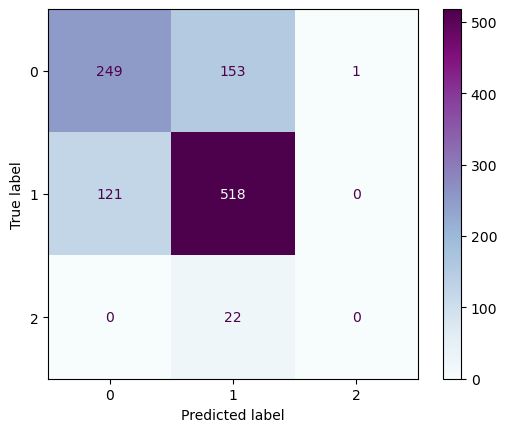

In [53]:
ConfusionMatrixDisplay(confusion_matrix(y_test_data, predictions)).plot(cmap='BuPu')

#### 3. Accuracy Score (not useful with imbalanced classes)

In [37]:
accuracy_score(y_test_data, predictions)

0.7208646616541353

#### 4. Cohen-Kappa Score (better for imbalanced classes)

A measure of classifier performance compared to a random-guessing model, especially good for an imbalanced data set.


Resources:
- https://analyticsindiamag.com/understanding-cohens-kappa-score-with-hands-on-implementation/
- https://www.knime.com/blog/cohens-kappa-an-overview



In [55]:
cohen_kappa_score(y_test_data, predictions)

0.41494842975023016

Result: Moderate agreement = 0.40 to 0.60

## Multiple ML models in a function

In [ ]:
####reminder:#### 
#dfs for x and y:
# y_data 
# x_data
#test data:
#
#
#################

#make array of model names
#for model in model names 
    #instantiate
    #fit
    #return accuracy, f1, cohen-kappa...

#instantiate all models with any parameters needed
lr = LogisticRegression(max_iter=5000)
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier() ## guessing this one is for classification. https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
##but there are others like nearestneighbors. or do i need to combine them? https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html
ls = LinearSVM #!
rs = RBFSVM #!
rf = RandomForest #!
nb = NaiveBayes #!
nn = NeuralNet #!

#create list of all model instances
classifier_model_defs = [lr, dt, kn, ls, rs, rf, nb, nn]

#define function
def deploy_models(x_training_data, x_test_data, y_training_data, y_test_data): #put all inputs needed here
    for model in classifier_model_defs:
        model.fit(x_training_data, y_training_data) #then, use fit() to pass in the x and y training data
        #now output some things to compare
    return()


deploy_models()

## Data preprocessing for ML 2

### 1. Feature reduction (round 1)

Goal: drop highly correlated features and drop features that do not help in the prediction.

https://machinelearningmastery.com/calculate-feature-importance-with-python/

### 2. Perform Feature scaling

#### Normalisation

In [23]:
#MinMaxScaler

#### Standardisation

In [24]:
# StandardScaler: It shrinks the range of the feature values. However, this scaler doesn't work correctly in the presence of outliers.
# RobustScaler: If your data set contains outliers, this scaler is more appropriate because it works with the 1st and 3rd quantiles and not the mean and variance scaling.

# data normalisation with sklearn
# from sklearn.preprocessing import MinMaxScaler

# # fit scaler on training data
# norm = MinMaxScaler().fit(X_train)

# # transform training data
# X_train_norm = norm.transform(X_train)

# # transform testing data
# X_test_norm = norm.transform(X_test)

### 3. Remove outliers??

Resource: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

## Improve ML Model (Logistic Regression)

### 2. Parameter tuning and model improvement with k-Fold cross-validation

use the k-Fold Validation to perform a validation of the training set for hyper-parameter tuning 
 
(check the Machine Learning Fundamentals chapter on Cross-Validation for more details). https://lms.codeacademyberlin.com/content/data/Machine-Learning-Fundamentals#:~:text=is%20called%20validation.-,Validation%20and%20K%2Dfold%20Cross%2DValidation,-Validation%20is%20a

For this task, you can use the scikit-learn method cross_val_score (NB- not the same as cross_validate)

## Apply ML Model: XXXXXXXX 

repeat all steps for new model